In [1]:
library(gggenomes)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: vctrs


Attaching package: ‘vctrs’


The following object is masked from ‘package:dplyr’:

    data_frame


Loading required package: gggenes

Loading required package: purrr

Loading required package: readr

Loading required package: stringr

Loading required package: tidyr

Loading required package: thacklr


Attaching package: ‘thacklr’


The following object is masked from ‘package:purrr’:

    %||%


Loading required package: tibble


Attaching package: ‘tibble’


The following object is masked from ‘package:vctrs’:

    data_frame


Loading required package: jsonlite


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Loading required packag

In [2]:
data(package="gggenomes")

Package,Item,Title
<chr>,<chr>,<chr>
gggenomes,emale_ava,All-versus-all whole genome alignments of 6 EMALE genomes
gggenomes,emale_cogs,Clusters of orthologs of 6 EMALE proteomes
gggenomes,emale_gc,Relative GC-content along 6 EMALE genomes
gggenomes,emale_genes,Gene annotations if 6 EMALE genomes (endogenous virophages)
gggenomes,emale_ngaros,Integrated Ngaro retrotransposons of 6 EMALE genomes
gggenomes,emale_prot_ava,All-versus-all alignments 6 EMALE proteomes
gggenomes,emale_prot_uniref50,Alignments of 6 EMALE proteomes against Uniref50
gggenomes,emale_seqs,Sequence index of 6 EMALE genomes (endogenous virophages)
gggenomes,emale_tirs,Terminal inverted repeats of 6 EMALE genomes


In [387]:
link_file %>% 
    dplyr::filter(region_name == "syntenic_regions16")

chr1,start1,end1,id1,chr2,start2,end2,id2,list_name,genome2,X5,region_name
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr3,7138575,7141354,Zm00001eb121460,CM009697.2,2498930,2500671,RLM92816.1,Zm__chr3__7116341_7325633_syntenic_regions16,Pm,NADP_ME1,syntenic_regions16
chr3,7138575,7141354,Zm00001eb121460,CM009696.2,51884416,51886356,RLN24312.1,Zm__chr3__7116341_7325633_syntenic_regions16,Pm,NADP_ME1,syntenic_regions16
chr3,7138575,7141354,Zm00001eb121460,Chr03,3328384,3330562,Sobic.003G035900,Zm__chr3__7116341_7325633_syntenic_regions16,Sb,NADP_ME1,syntenic_regions16
chr3,7138575,7141354,Zm00001eb121460,Chr05,36456778,36460644,Urofu.5G465000,Zm__chr3__7116341_7325633_syntenic_regions16,Uf,NADP_ME1,syntenic_regions16
chr3,7138575,7141354,Zm00001eb121460,Chr1,4800246,4802179,LOC_Os01g09430,Zm__chr3__7116341_7325633_syntenic_regions16,Os,NADP_ME1,syntenic_regions16
chr3,7184481,7190135,Zm00001eb121470,CM009697.2,2510264,2515437,RLM94032.1,Zm__chr3__7116341_7325633_syntenic_regions16,Pm,NADP_ME1,syntenic_regions16
chr3,7184481,7190135,Zm00001eb121470,CM009696.2,51868651,51873514,RLN21759.1,Zm__chr3__7116341_7325633_syntenic_regions16,Pm,NADP_ME1,syntenic_regions16
chr3,7184481,7190135,Zm00001eb121470,Chr03,3341071,3347117,Sorbiv5.1_pg15531,Zm__chr3__7116341_7325633_syntenic_regions16,Sb,NADP_ME1,syntenic_regions16
chr3,7184481,7190135,Zm00001eb121470,Chr05,36445588,36451016,Urofu.5G464900,Zm__chr3__7116341_7325633_syntenic_regions16,Uf,NADP_ME1,syntenic_regions16


In [364]:
link_file <- read_tsv("/home/jpm73279/genome_downloads/C4_markers/C4-genes.syntenic.blocks.tsv")


zm_grouping_only <- select(link_file, start1, end1, id1, region_name) %>% 
    dplyr::mutate(seq_id = str_c("Zm", region_name, sep = "_")) %>% 
    dplyr::select(-region_name) %>% 
    dplyr::rename(start = start1,
                  end = end1, 
                 id = id1)

other_species <- link_file %>% 
    dplyr::mutate(seq_id = str_c(genome2, region_name, sep = "_")) %>% 
    dplyr::select(start2, end2, id2, seq_id) %>% 
    dplyr::rename(start = start2,
                  end = end2, 
                 id = id2)

combined_regions <- bind_rows(zm_grouping_only,other_species)
    

Rows: 694 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (8): chr1, id1, chr2, id2, list_name, genome2, X5, region_name
dbl (4): start1, end1, start2, end2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [392]:
get_gene_relationships <- link_file %>% 
    dplyr::select(id1, id2)

non_zm_combos <- get_gene_relationships %>% 
    dplyr::group_by(id1) %>% 
    expand(id2, feat_id2 = id2) %>% 
    dplyr::filter(id2 != feat_id2) %>% 
    ungroup() %>% 
    dplyr::select(id2, feat_id2) %>% 
    dplyr::rename(id1 = id2, id2 = feat_id2)

all_combos <- bind_rows(get_gene_relationships,non_zm_combos)


In [394]:
pairwse_gene_links <- left_join(all_combos, combined_regions, by = c("id1" = "id")) %>%
    left_join(., combined_regions, by = c("id2" = "id"), suffix = c("", "2"))

Warning message in left_join(all_combos, combined_regions, by = c(id1 = "id")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in left_join(., combined_regions, by = c(id2 = "id"), suffix = c("", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 69 of `x` matches multiple rows in `y`.
ℹ Row 695 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [426]:
gggenome_prep_function <- function(gff3_file, msbedgraph, bsbedgraph, bed_file, species) {
  # Read and process the GFF3 file
  zm_gff3 <- read_gff3(gff3_file, types = c("mRNA", "CDS", "exon", "five_prime_UTR", "three_prime_UTR")) %>% 
    dplyr::rename(
      chrom = seq_id, # rename 'seq_id' column to 'chrom'
      seq_id = loci   # rename 'loci' column to 'seq_id'
    ) %>% 
    dplyr::mutate(seq_id = paste(species, seq_id, sep = "_")) # add 'species' to 'seq_id'

  
  # Helper function to process bedgraph files
  process_bedgraph <- function(file, species) {
    x <- read.table(file, col.names = c("chrom", "start", "end", "score", "seq_id")) %>%
      dplyr::mutate(seq_id = paste(species, seq_id, sep = "_"))
    return(x)
  }
  
  # Read and process the methylation sensitive bedgraph file
  zm_ms <- process_bedgraph(msbedgraph, species)
  
  # Read and process the bundle sheath bedgraph file
  zm_bs <- process_bedgraph(bsbedgraph, species)
  
  # Read and process the bed file
  zm_bed <- read.table(bed_file, col.names = c("chrom", "start", "end", "name", "seq_id")) %>%
    tidyr::separate(col = name, into = c("tmp_name", "name"), sep = ";") %>% # separate 'name' into two columns
    dplyr::select(-tmp_name) %>% # remove the temporary column
    dplyr::mutate(seq_id = paste(species, seq_id, sep = "_")) # add 'species' to 'seq_id'
  
  # Return a list containing all the processed data frames
  return(list(zm_gff3 = zm_gff3, zm_ms = zm_ms, zm_bs = zm_bs, zm_bed = zm_bed))
}

In [427]:
result_list <- gggenome_prep_function(
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Zm.gggenomes.test.better.gff3",
  "/home/jpm73279/genome_downloads/gggenomes/zm.peaks_mesophyll.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/zm.peaks_bundle_sheath.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Zm.gggenomes.test.better.acr",
  "Zm"
)

# Now, each of the required data frames can be accessed from the list
zm_gff3 <- result_list$zm_gff3
zm.ms <- result_list$zm_ms
zm.bs <- result_list$zm_bs
zm_bed <- result_list$zm_bed

sb_result_list <- gggenome_prep_function(
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Sb.gggenomes.test.better.gff3",
  "/home/jpm73279/genome_downloads/gggenomes/sb.peaks_mesophyll.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/sb.peaks_bundle_sheath.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Sb.gggenomes.test.better.acr",
  "Sb"
)

# Now, each of the required data frames can be accessed from the list
sb_gff3 <- sb_result_list$zm_gff3
sb.ms <- sb_result_list$zm_ms
sb.bs <- sb_result_list$zm_bs
sb_bed <- sb_result_list$zm_bed

Harmonizing attribute names
• ID -> feat_id
• Parent -> parent_ids
• Loci -> loci
• Name -> name
Features read
# A tibble: 5 × 3
  source type                n
  <chr>  <chr>           <int>
1 NAM    CDS               255
2 NAM    exon             2828
3 NAM    five_prime_UTR    464
4 NAM    mRNA              256
5 NAM    three_prime_UTR   401
Harmonizing attribute names
• ID -> feat_id
• Name -> name
• Parent -> parent_ids
• Loci -> loci
Features read
# A tibble: 4 × 3
  source   type                n
  <chr>    <chr>           <int>
1 JGI_gene CDS              1652
2 JGI_gene five_prime_UTR    322
3 JGI_gene mRNA            17642
4 JGI_gene three_prime_UTR   352


In [428]:
sb_gff3

chrom,start,end,strand,type,feat_id,introns,parent_ids,source,score,phase,name,longest,seq_id,geom_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<list>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.1
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.2
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.3
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.4
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.5
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.6
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.7
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.8
Chr01,5645439,5648604,+,mRNA,PAC4GC:57768526,,Sobic.001G073600,JGI_gene,NA,NA,Sobic.001G073600.2,1,Sb_syntenic_regions6,PAC4GC:57768526.CDS.1


In [429]:

os_result_list <- gggenome_prep_function(
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Os.gggenomes.test.better.gff3",
  "/home/jpm73279/genome_downloads/gggenomes/os.peaks_mesophyll.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/os.peaks_bundle_sheath.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Os.gggenomes.test.better.acr",
  "Os"
)

# Now, each of the required data frames can be accessed from the list
os_gff3 <- os_result_list$zm_gff3
os.ms <- os_result_list$zm_ms
os.bs <- os_result_list$zm_bs
os_bed <- os_result_list$zm_bed

pm_result_list <- gggenome_prep_function(
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Zm.gggenomes.test.better.gff3",
  "/home/jpm73279/genome_downloads/gggenomes/pm.peaks_mesophyll.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/pm.peaks_bundle_sheath.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Pm.gggenomes.test.better.acr",
  "Sb"
)

# Now, each of the required data frames can be accessed from the list
pm_gff3 <- pm_result_list$zm_gff3
pm.ms <- pm_result_list$zm_ms
pm.bs <- pm_result_list$zm_bs
pm_bed <- pm_result_list$zm_bed

uf_result_list <- gggenome_prep_function(
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Uf.gggenomes.test.better.gff3",
  "/home/jpm73279/genome_downloads/gggenomes/uf.peaks_mesophyll.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/uf.peaks_bundle_sheath.pool.macs_treat_pileup.normalized.bdg.updated.bedgraph",
  "/home/jpm73279/genome_downloads/gggenomes/gggenomes_files/Uf.gggenomes.test.better.acr",
  "Uf"
)

# Now, each of the required data frames can be accessed from the list
uf_gff3 <- uf_result_list$zm_gff3
uf.ms <- uf_result_list$zm_ms
uf.bs <- uf_result_list$zm_bs
uf_bed <- uf_result_list$zm_bed

Harmonizing attribute names
• ID -> feat_id
• Name -> name
• Parent -> parent_ids
• Loci -> loci
Features read
# A tibble: 4 × 3
  source       type                n
  <chr>        <chr>           <int>
1 phytozomev11 CDS              2063
2 phytozomev11 five_prime_UTR    318
3 phytozomev11 mRNA            23437
4 phytozomev11 three_prime_UTR   329
Harmonizing attribute names
• ID -> feat_id
• Parent -> parent_ids
• Loci -> loci
• Name -> name
Features read
# A tibble: 5 × 3
  source type                n
  <chr>  <chr>           <int>
1 NAM    CDS               255
2 NAM    exon             2828
3 NAM    five_prime_UTR    464
4 NAM    mRNA              256
5 NAM    three_prime_UTR   401
Harmonizing attribute names
• ID -> feat_id
• Name -> name
• Parent -> parent_ids
• Loci -> loci
Features read
# A tibble: 4 × 3
  source       type                n
  <chr>        <chr>           <int>
1 phytozomev13 CDS              3783
2 phytozomev13 five_prime_UTR    665
3 phytozomev13 mRNA       

In [454]:
pepck <- bind_rows(zm_gff3,sb_gff3, os_gff3, uf_gff3) %>% 
  filter(grepl("syntenic_regions16", seq_id))

bs <- bind_rows(zm.bs, sb.bs, uf.bs, os.bs)
ms <- bind_rows(zm.ms, sb.ms,uf.ms, os.ms)
beds <- bind_rows(sb_bed, zm_bed, uf_bed, os_bed)

In [444]:
# pepck <- bind_rows(sb_gff3, os_gff3, uf_gff3) %>% 
#   filter(grepl("syntenic_regions16", seq_id))

# bs <- bind_rows(zm.bs, sb.bs, uf.bs, os.bs)
# ms <- bind_rows(zm.ms, sb.ms,uf.ms, os.ms)
# beds <- bind_rows(sb_bed, zm_bed, uf_bed, os_bed)

In [455]:
combined <- max(bind_rows(bs, ms)$score)

In [457]:

options(repr.plot.width=20, repr.plot.height=15)

p2 <- gggenomes(pepck, feats = list(ms = ms, bs = bs, acrs = beds), links = pairwse_gene_links) +
    geom_feat(data = feats(acrs)) + 
      geom_coverage(data = feats(ms), aes(z = score), fill="red", offset=-.2, height=.1) + 
      geom_coverage(data = feats(bs), aes(z = score), fill="blue", offset=-.3, height=.1) + 
      geom_gene() + geom_bin_label() +
      geom_link()

No seqs provided, inferring seqs from feats


coverage max
• max: 17.87825
coverage max
• max: 19.27722


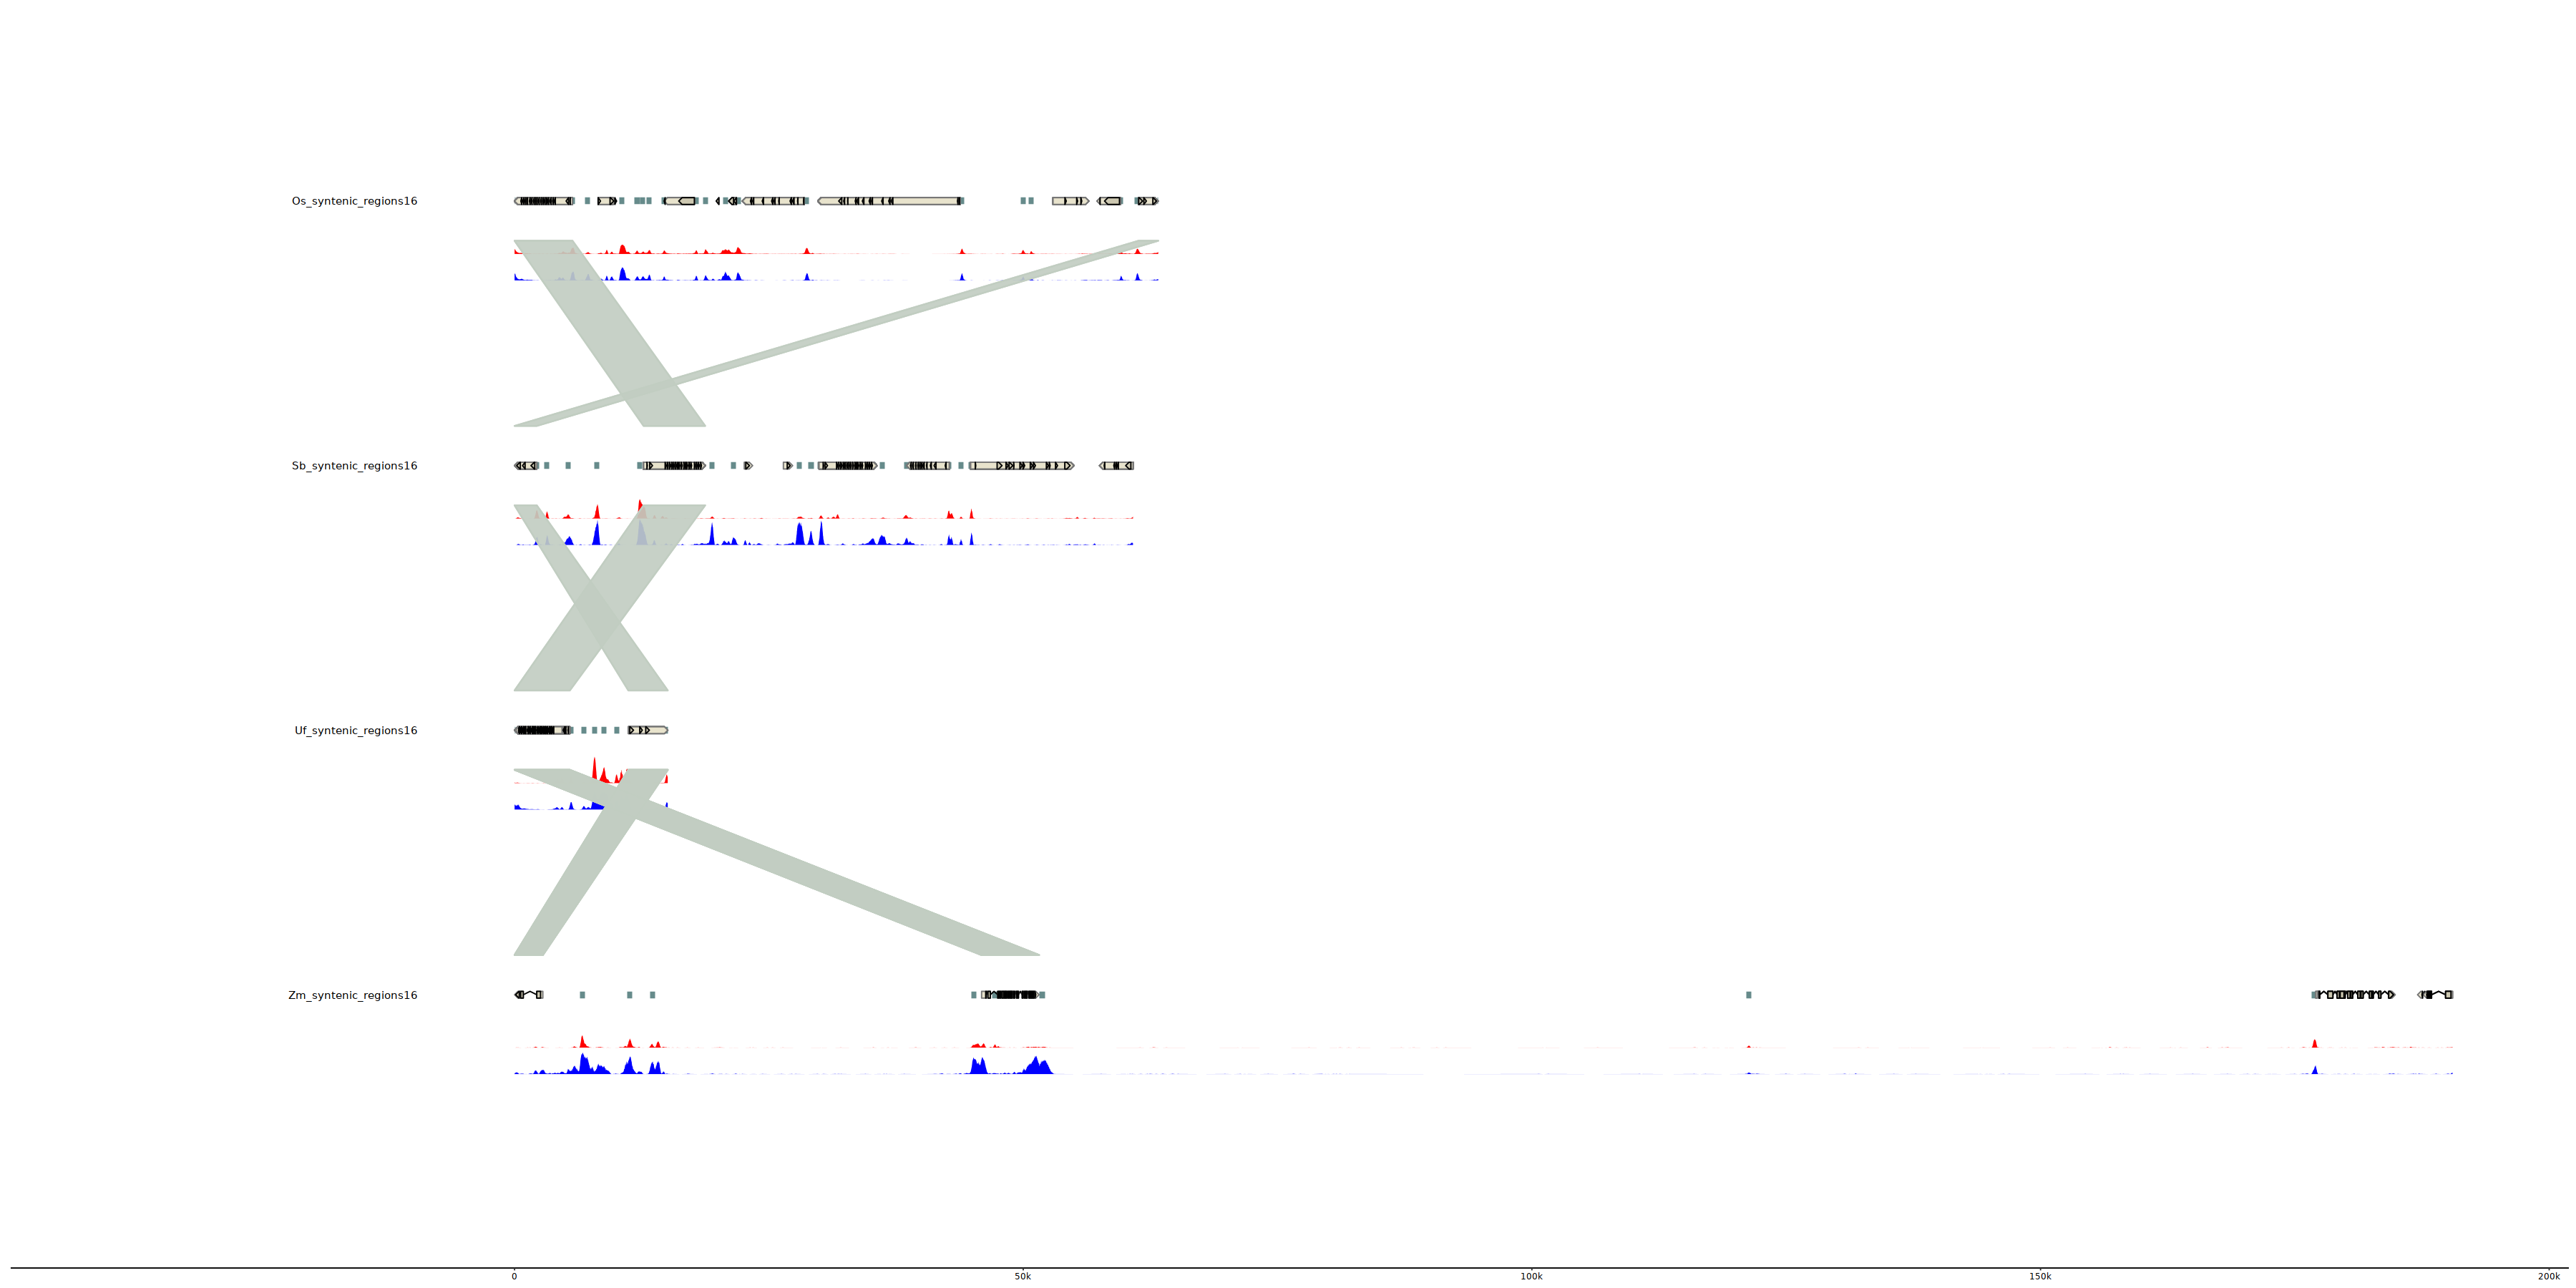

In [458]:
options(repr.plot.width=30, repr.plot.height=15)
p2